# 蜡烛图特征

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import mplfinance as mpf
%matplotlib inline

[*********************100%***********************]  1 of 1 completed


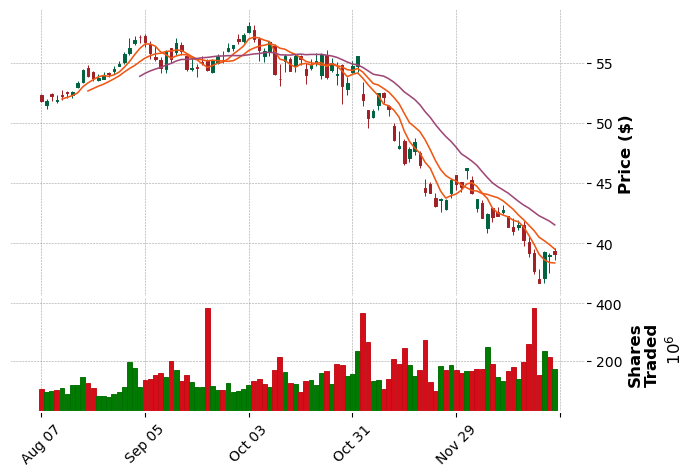

In [2]:
AAPL = yf.download('AAPL',start = '2015-01-01', end = '2018-12-31' ) #One stock example
mpf.plot(AAPL.iloc[-100:], 
         type='candle',
         style='charles',
         ylabel='Price ($)',
         mav=(5,10,20),
         volume=True,
         ylabel_lower='Shares\nTraded',
)

## Content


Reference  
[1] [How to identify Japanese candlesticks patterns in Python](https://towardsdatascience.com/how-to-identify-japanese-candlesticks-patterns-in-python-b835d1cc72f7)


In [3]:
df = AAPL

for i in range(2,df.shape[0]):
    current = df.iloc[i,:]
    prev = df.iloc[i-1,:]
    prev_2 = df.iloc[i-2,:]

    realbody = abs(current['Open'] - current['Close'])
    candle_range = current['High'] - current['Low']
    idx = df.index[i]
  
    # Bullish swing
    df.loc[idx,'Bullish swing'] = current['Low'] > prev['Low'] and prev['Low'] < prev_2['Low']
    # Bearish swing
    df.loc[idx,'Bearish swing'] = current['High'] < prev['High'] and prev['High'] > prev_2['High']
    # Bullish pinbar
    df.loc[idx,'Bullish pinbar'] = realbody <= candle_range/3 and  min(current['Open'], current['Close']) > (current['High'] + current['Low'])/2 and current['Low'] < prev['Low']
    # Bearish pinbar
    df.loc[idx,'Bearish pinbar'] = realbody <= candle_range/3 and max(current['Open'] , current['Close']) < (current['High'] + current['Low'])/2 and current['High'] > prev['High']
    # Inside bar
    df.loc[idx,'Inside bar'] = current['High'] < prev['High'] and current['Low'] > prev['Low']
    # Outside bar
    df.loc[idx,'Outside bar'] = current['High'] > prev['High'] and current['Low'] < prev['Low']  
    # Bullish engulfing
    df.loc[idx,'Bullish engulfing'] = current['High'] > prev['High'] and current['Low'] < prev['Low'] and realbody >= 0.8 * candle_range and current['Close'] > current['Open']
    # Bearish engulfing
    df.loc[idx,'Bearish engulfing'] = current['High'] > prev['High'] and current['Low'] < prev['Low'] and realbody >= 0.8 * candle_range and current['Close'] < current['Open']
    df.fillna(False, inplace=True)

In [4]:
df.loc[df['Bullish engulfing'] == True]

,Open,High,Low,Close,Adj Close,Volume,Bullish swing,Bearish swing,Bullish pinbar,Bearish pinbar,Inside bar,Outside bar,Bullish engulfing,Bearish engulfing
Date,,,,,,,,,,,,,,
2016-03-29,26.222500,26.947500,26.219999,26.920000,25.038527,124760400,False,False,False,False,False,True,True,False
2016-12-07,27.315001,27.797501,27.290001,27.757500,26.249474,119994800,False,False,False,False,False,True,True,False
2016-12-23,28.897499,29.129999,28.897499,29.129999,27.547411,56998000,False,False,False,False,False,True,True,False
2017-01-17,29.584999,30.059999,29.555000,30.000000,28.370150,137759200,False,False,False,False,False,True,True,False
2017-12-11,42.299999,43.222500,42.197498,43.167500,41.478737,141095200,False,False,False,False,False,True,True,False
2018-04-04,41.220001,43.002499,41.192501,42.902500,41.392178,138422000,False,False,False,False,False,True,True,False
